In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [179]:
nat_pop = pd.read_csv("Data/Population/PopulationReport.csv")
AL_pop = pd.read_csv("Data/Population/PopulationReportAlabama.csv")
AL_pop["State"] = "Alabama"
AK_pop = pd.read_csv("Data/Population/PopulationReportArkansas.csv")
AK_pop["State"] = "Arkansas"
FL_pop = pd.read_csv("Data/Population/PopulationReportFlorida.csv")
FL_pop["State"] = "Florida"
GA_pop = pd.read_csv("Data/Population/PopulationReportGeorgia.csv")
GA_pop["State"] = "Georgia"
KY_pop = pd.read_csv("Data/Population/PopulationReportKentucky.csv")
KY_pop["State"] = "Kentucky"
LA_pop = pd.read_csv("Data/Population/PopulationReportLouisiana.csv")
LA_pop["State"] = "Louisiana"
MD_pop = pd.read_csv("Data/Population/PopulationReportMaryland.csv")
MD_pop["State"] = "Maryland"
MS_pop = pd.read_csv("Data/Population/PopulationReportMississippi.csv")
MS_pop["State"] = "Mississippi"
NC_pop = pd.read_csv("Data/Population/PopulationReportNorthCarolina.csv")
NC_pop["State"] = "North Carolina"
SC_pop = pd.read_csv("Data/Population/PopulationReportSouthCarolina.csv")
SC_pop["State"] = "South Carolina"
TN_pop = pd.read_csv("Data/Population/PopulationReportTennessee.csv")
TN_pop["State"] = "Tennessee"
VA_pop = pd.read_csv("Data/Population/PopulationReportVirginia.csv")
VA_pop["State"] = "Virginia"
WV_pop = pd.read_csv("Data/Population/PopulationReportWestVirginia.csv")
WV_pop["State"] = "West Virginia"

test_cat = pd.concat([AL_pop, AK_pop,FL_pop,GA_pop,KY_pop, LA_pop,MD_pop,MS_pop,SC_pop,TN_pop, VA_pop, WV_pop, NC_pop],ignore_index=True).dropna()
test_cat = test_cat.replace(',','', regex=True)

test_cat = test_cat.astype({"current_year" : "int32"})


test_cat.sort_values("current_year",ascending=False).head()

test_cat = test_cat[["fips","name","current_year","State"]]

test_cat.sort_values("current_year",ascending=False).head()

pop_df = test_cat.rename(columns = {"current_year" : "current_year_pop"})
pop_df.head().sort_values("name")


,fips,name,current_year_pop,State
1,1001,Autauga,59095,Alabama
2,1003,Baldwin,239294,Alabama
3,1005,Barbour,24964,Alabama
4,1007,Bibb,22477,Alabama
5,1009,Blount,59041,Alabama


In [180]:

AL_edu_cc = pd.read_csv("Data/Education/EducationReport-Alabama-CC.csv")
AK_edu_cc = pd.read_csv("Data/Education/EducationReport-Arkansas-CC.csv")
FL_edu_cc = pd.read_csv("Data/Education/EducationReport-Florida-CC.csv")
GA_edu_cc = pd.read_csv("Data/Education/EducationReport-Georgia-CC.csv")
KY_edu_cc = pd.read_csv("Data/Education/EducationReport-Kentucky-CC.csv")
LA_edu_cc = pd.read_csv("Data/Education/EducationReport-Louisiana-CC.csv")
MD_edu_cc = pd.read_csv("Data/Education/EducationReport-Maryland-CC.csv")
MS_edu_cc = pd.read_csv("Data/Education/EducationReport-Mississippi-CC.csv")
NC_edu_cc = pd.read_csv("Data/Education/EducationReport-NorthCarolina-CC.csv")
SC_edu_cc = pd.read_csv("Data/Education/EducationReport-SouthCarolina-CC.csv")
TN_edu_cc = pd.read_csv("Data/Education/EducationReport-Tennessee-CC.csv")
VA_edu_cc = pd.read_csv("Data/Education/EducationReport-Virginia-CC.csv")
WV_edu_cc = pd.read_csv("Data/Education/EducationReport-WestVirginia-CC.csv")
	  
AL_edu_cc["State"] = "Alabama"          
AK_edu_cc["State"] = "Arkansas"         
FL_edu_cc["State"] = "Florida"          
GA_edu_cc["State"] = "Georgia"          
KY_edu_cc["State"] = "Kentucky"         
LA_edu_cc["State"] = "Louisiana"        
MD_edu_cc["State"] = "Maryland"         
MS_edu_cc["State"] = "Mississippi"      
NC_edu_cc["State"] = "North Carolina"   
SC_edu_cc["State"] = "South Carolina"   
TN_edu_cc["State"] = "Tennessee"        
VA_edu_cc["State"] = "Virginia"          
WV_edu_cc["State"] = "West Virginia"

AL_edu_cc["EducationType"] = "Completed College"
AK_edu_cc["EducationType"] = "Completed College"
FL_edu_cc["EducationType"] = "Completed College"
GA_edu_cc["EducationType"] = "Completed College"
KY_edu_cc["EducationType"] = "Completed College"
LA_edu_cc["EducationType"] = "Completed College"
MD_edu_cc["EducationType"] = "Completed College"
MS_edu_cc["EducationType"] = "Completed College"
NC_edu_cc["EducationType"] = "Completed College"
SC_edu_cc["EducationType"] = "Completed College"
TN_edu_cc["EducationType"] = "Completed College"
VA_edu_cc["EducationType"] = "Completed College" 
WV_edu_cc["EducationType"] = "Completed College"

AL_edu_nchs = pd.read_csv("Data/Education/EducationReport-Alabama-NCHS.csv")
AK_edu_nchs = pd.read_csv("Data/Education/EducationReport-Arkansas-NCHS.csv")
FL_edu_nchs = pd.read_csv("Data/Education/EducationReport-Florida-NCHS.csv")
GA_edu_nchs = pd.read_csv("Data/Education/EducationReport-Georgia-NCHS.csv")
KY_edu_nchs = pd.read_csv("Data/Education/EducationReport-Kentucky-NCHS.csv")
LA_edu_nchs = pd.read_csv("Data/Education/EducationReport-Louisiana-NCHS.csv")
MD_edu_nchs = pd.read_csv("Data/Education/EducationReport-Maryland-NCHS.csv")
MS_edu_nchs = pd.read_csv("Data/Education/EducationReport-Mississippi-NCHS.csv")
NC_edu_nchs = pd.read_csv("Data/Education/EducationReport-NorthCarolina-NCHS.csv")
SC_edu_nchs = pd.read_csv("Data/Education/EducationReport-SouthCarolina-NCHS.csv")
TN_edu_nchs = pd.read_csv("Data/Education/EducationReport-Tennessee-NCHS.csv")
VA_edu_nchs = pd.read_csv("Data/Education/EducationReport-Virginia-NCHS.csv")
WV_edu_nchs = pd.read_csv("Data/Education/EducationReport-WestVirginia-NCHS.csv")

AL_edu_nchs["State"] = "Alabama"          
AK_edu_nchs["State"] = "Arkansas"         
FL_edu_nchs["State"] = "Florida"          
GA_edu_nchs["State"] = "Georgia"          
KY_edu_nchs["State"] = "Kentucky"         
LA_edu_nchs["State"] = "Louisiana"        
MD_edu_nchs["State"] = "Maryland"         
MS_edu_nchs["State"] = "Mississippi"      
NC_edu_nchs["State"] = "North Carolina"   
SC_edu_nchs["State"] = "South Carolina"   
TN_edu_nchs["State"] = "Tennessee"        
VA_edu_nchs["State"] = "Virginia"          
WV_edu_nchs["State"] = "West Virginia"
	 
AL_edu_nchs["EducationType"] = "Not Completed High School"
AK_edu_nchs["EducationType"] = "Not Completed High School"
FL_edu_nchs["EducationType"] = "Not Completed High School"
GA_edu_nchs["EducationType"] = "Not Completed High School"
KY_edu_nchs["EducationType"] = "Not Completed High School"
LA_edu_nchs["EducationType"] = "Not Completed High School"
MD_edu_nchs["EducationType"] = "Not Completed High School"
MS_edu_nchs["EducationType"] = "Not Completed High School"
NC_edu_nchs["EducationType"] = "Not Completed High School"
SC_edu_nchs["EducationType"] = "Not Completed High School"
TN_edu_nchs["EducationType"] = "Not Completed High School"
VA_edu_nchs["EducationType"] = "Not Completed High School" 
WV_edu_nchs["EducationType"] = "Not Completed High School"

edu_concat_list = [AL_edu_cc,AK_edu_cc,FL_edu_cc,GA_edu_cc,KY_edu_cc,LA_edu_cc,MD_edu_cc,MS_edu_cc,NC_edu_cc,SC_edu_cc,TN_edu_cc,VA_edu_cc,WV_edu_cc,AL_edu_nchs,AK_edu_nchs,FL_edu_nchs,GA_edu_nchs,KY_edu_nchs,LA_edu_nchs,MD_edu_nchs,MS_edu_nchs,NC_edu_nchs,SC_edu_nchs,TN_edu_nchs,VA_edu_nchs,WV_edu_nchs]
edu_df = pd.concat(edu_concat_list, ignore_index=True)
edu_df = edu_df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'])
edu_df["county"] = edu_df["county"].str.strip()
edu_df["county"] = edu_df["county"].str[:-4]
edu_df.to_csv("Data/Education/EducationReport-Full.csv", index=False, mode='w+')
edu_df = edu_df.replace('%','', regex=True)
edu_df = edu_df.astype({"rate_2010": float})



print(edu_df.columns)

edu_df.shape

Index(['Textbox12', 'fips', 'county', 'ruc_code', 'rate_1970', 'rate_1980',
       'rate_1990', 'rate_2000', 'rate_2010', 'State', 'EducationType'],
      dtype='object')


(2204, 11)

In [181]:
AK_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Arkansas Data - v1.xlsx",sheet_name = 3, header=[0,1])
AK_obesity.columns = AK_obesity.columns.map(': '.join)

AL_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Alabama Data - v1.xlsx",sheet_name = 3, header=[0,1])
AL_obesity.columns = AL_obesity.columns.map(': '.join)

FL_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Florida Data - v1.xlsx",sheet_name = 3, header=[0,1])
FL_obesity.columns = FL_obesity.columns.map(': '.join)

GA_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Georgia Data - v1.xlsx",sheet_name = 3, header=[0,1])
GA_obesity.columns = GA_obesity.columns.map(': '.join)

KY_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Kentucky Data - v1.xlsx",sheet_name = 3, header=[0,1])
KY_obesity.columns = KY_obesity.columns.map(': '.join)

LA_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Louisiana Data - v1.xlsx",sheet_name = 3, header=[0,1])
LA_obesity.columns = LA_obesity.columns.map(': '.join)

MD_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Maryland Data - v1.xlsx",sheet_name = 3, header=[0,1])
MD_obesity.columns = MD_obesity.columns.map(': '.join)

MS_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Mississippi Data - v1.xlsx",sheet_name = 3, header=[0,1])
MS_obesity.columns = MS_obesity.columns.map(': '.join)

NC_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings North Carolina Data - v1.xlsx",sheet_name = 3, header=[0,1])
NC_obesity.columns = NC_obesity.columns.map(': '.join)

SC_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings South Carolina Data - v1.xlsx",sheet_name = 3, header=[0,1])
SC_obesity.columns = SC_obesity.columns.map(': '.join)

TN_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Tennessee Data - v1.xlsx",sheet_name = 3, header=[0,1])
TN_obesity.columns = TN_obesity.columns.map(': '.join)

VA_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings Virginia Data - v1.xlsx",sheet_name = 3, header=[0,1])
VA_obesity.columns = VA_obesity.columns.map(': '.join)

WV_obesity = pd.read_excel("Data/Obesity/2022 County Health Rankings West Virginia Data - v1.xlsx",sheet_name = 3, header=[0,1])
WV_obesity.columns = WV_obesity.columns.map(': '.join)

df_frames = [AK_obesity, AL_obesity, FL_obesity, GA_obesity, KY_obesity, LA_obesity, MD_obesity, MS_obesity, NC_obesity, SC_obesity, TN_obesity, VA_obesity, WV_obesity]

for states in df_frames:
    states.rename(columns={ states.columns[0]: "fips", states.columns[1]: "States", states.columns[2]: "County" }, inplace=True)

obesity_df = pd.concat(df_frames, axis=0)
obesity_df.head()

columns_to_drop = [
        'Driving alone to work: % Drive Alone to Work',
        'Driving alone to work: 95% CI - Low',
        'Driving alone to work: 95% CI - High',
        'Driving alone to work: Z-Score',
        'Driving alone to work: % Drive Alone (AIAN)',
        'Driving alone to work: % Drive Alone (AIAN) 95% CI - Low',
        'Driving alone to work: % Drive Alone (AIAN) 95% CI - High',
        'Driving alone to work: % Drive Alone (Asian)',
        'Driving alone to work: % Drive Alone (Asian) 95% CI - Low',
        'Driving alone to work: % Drive Alone (Asian) 95% CI - High',
        'Driving alone to work: % Drive Alone (Black)',
        'Driving alone to work: % Drive Alone (Black) 95% CI - Low',
        'Driving alone to work: % Drive Alone (Black) 95% CI - High',
        'Driving alone to work: % Drive Alone (Hispanic)', 
        'Driving alone to work: % Drive Alone (Hispanic) 95% CI - Low',
        'Driving alone to work: % Drive Alone (Hispanic) 95% CI - High',
        'Driving alone to work: % Drive Alone (white)',
        'Driving alone to work: % Drive Alone (white) 95% CI - Low',
        'Driving alone to work: % Drive Alone (white) 95% CI - High',
        'Long commute - driving alone: # Workers who Drive Alone',
        'Long commute - driving alone: % Long Commute - Drives Alone',
        'Long commute - driving alone: 95% CI - Low',
        'Long commute - driving alone: 95% CI - High',
        'Long commute - driving alone: Z-Score'
       ]

obesity_df.drop(columns_to_drop, axis=1, inplace=True)


print(obesity_df.columns)

obesity_df.shape


Index(['fips', 'States', 'County', 'Premature death: Unreliable',
       'Premature death: Deaths',
       'Premature death: Years of Potential Life Lost Rate',
       'Premature death: 95% CI - Low', 'Premature death: 95% CI - High',
       'Premature death: Z-Score', 'Premature death: YPLL Rate (AIAN)',
       ...
       'Severe housing problems: Severe Housing Cost Burden',
       'Severe housing problems: Severe Housing Cost Burden 95% CI - Low',
       'Severe housing problems: Severe Housing Cost Burden 95% CI - High',
       'Severe housing problems: Overcrowding',
       'Severe housing problems: Overcrowding 95% CI - Low',
       'Severe housing problems: Overcrowding 95% CI - High',
       'Severe housing problems: Inadequate Facilities',
       'Severe housing problems: Inadequate Facilities 95% CI - Low',
       'Severe housing problems: Inadequate Facilities 95% CI - High',
       'Severe housing problems: Z-Score'],
      dtype='object', length=225)


(1100, 225)

In [182]:
nat_pov = pd.read_csv("Data/Poverty/NationalPoverty.csv")
AL_pov = pd.read_csv("Data/Poverty/AlabamaPoverty.csv")
AL_pov["State"] = "Alabama"
AK_pov = pd.read_csv("Data/Poverty/ArkansasPoverty.csv")
AK_pov["State"] = "Arkansas"
FL_pov = pd.read_csv("Data/Poverty/FloridaPoverty.csv")
FL_pov["State"] = "Florida"
GA_pov = pd.read_csv("Data/Poverty/GeorgiaPoverty.csv")
GA_pov["State"] = "Georgia"
KY_pov = pd.read_csv("Data/Poverty/KentuckyPoverty.csv")
KY_pov["State"] = "Kentucky"
LA_pov = pd.read_csv("Data/Poverty/LouisianaPoverty.csv")
LA_pov["State"] = "Louisiana"
MD_pov = pd.read_csv("Data/Poverty/MarylandPoverty.csv")
MD_pov["State"] = "Maryland"
MS_pov = pd.read_csv("Data/Poverty/MississippiPoverty.csv")
MS_pov["State"] = "Mississippi"
NC_pov = pd.read_csv("Data/Poverty/NorthCarolinaPoverty.csv")
NC_pov["State"] = "North Carolina"
SC_pov = pd.read_csv("Data/Poverty/SouthCarolinaPoverty.csv")
SC_pov["State"] = "South Carolina"
TN_pov = pd.read_csv("Data/Poverty/TennesseePoverty.csv")
TN_pov["State"] = "Tennessee"
VA_pov = pd.read_csv("Data/Poverty/VirginiaPoverty.csv")
VA_pov["State"] = "Virginia"
WV_pov = pd.read_csv("Data/Poverty/WestVirginiaPoverty.csv")
WV_pov["State"] = "West Virginia"
concat_list = [AL_pov, AK_pov, FL_pov, GA_pov, KY_pov, LA_pov, MD_pov, MS_pov, NC_pov, SC_pov, TN_pov, VA_pov, WV_pov]
pov_df = pd.concat(concat_list, ignore_index=True)
pov_df = pov_df.replace(',','', regex=True)
pov_df = pov_df.astype({"total_est" : "int32"})
pov_df = pov_df.astype({"under18" : "int32"})
pov_df = pov_df.drop(["Textbox93", "Textbox96", "ruc_code", "total_Bmin", "total_Bmax", "under18_Bmin", "under18_Bmax"], axis=1)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Florida"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Georgia"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "North Carolina"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Tennessee"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Louisiana"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Virginia"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Alabama"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "South Carolina"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Kentucky"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Mississippi"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Maryland"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "Arkansas"].index)
pov_df = pov_df.drop(pov_df[pov_df["county"] == "West Virginia"].index)
pov_df.sort_values("total_est",ascending=False).head()
pov_df.sort_values("fips",ascending=True).head()



,fips,county,total_est,under18,State
1,1001,Autauga,6242,1912,Alabama
2,1003,Baldwin,20189,5907,Alabama
3,1005,Barbour,5548,1857,Alabama
4,1007,Bibb,3549,941,Alabama
5,1009,Blount,7525,2456,Alabama


In [183]:
AL_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Alabama.csv")
AL_unemp['State'] = 'Alabama'
AK_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Arkansas.csv")
AK_unemp['State'] = 'Arkansas'
FL_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Florida.csv")
FL_unemp['State'] = "Florida"
GA_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Georgia.csv")
GA_unemp['State'] = "Georgia"
KY_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Kentucky.csv")
KY_unemp['State'] = "Kentucky"
LA_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Louisiana.csv")
LA_unemp['State'] = "Louisiana"
MD_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Maryland.csv")
MD_unemp['State'] = "Maryland"
MS_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Mississippi.csv")
MS_unemp['State'] = "Mississippi"
NC_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_NorthCarolina.csv")
NC_unemp['State'] = "North Carolina"
SC_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_SouthCarolina.csv")
SC_unemp['State'] = "South Carolina"
TN_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Tennessee.csv")
TN_unemp['State'] = "Tennessee"
VA_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_Virginia.csv")
VA_unemp['State'] = "Virginia"
WV_unemp = pd.read_csv("Data/Unemployment/UnemploymentReport_WestVirginia.csv")
WV_unemp['State'] = "West Virginia"
concat_list_unemp = [AL_unemp, AK_unemp, FL_unemp, GA_unemp, KY_unemp, LA_unemp, MD_unemp, MS_unemp, NC_unemp, SC_unemp, TN_unemp, VA_unemp, WV_unemp]
unemp_df = pd.concat(concat_list_unemp, ignore_index = True)
unemp_df = unemp_df.drop(["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"], axis = 1)
unemp_df = unemp_df.drop(["% of State Median HH Income"], axis = 1)
unemp_df = unemp_df.replace(',','', regex = True)


unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Alabama'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Arkansas'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Florida'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Georgia'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'North Carolina'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Tennessee'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Louisiana'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Virginia'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Kentucky'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'South Carolina'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Maryland'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'Mississppi'].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df["Name"] == 'West Virginia'].index)
unemp_df["Name"] = unemp_df["Name"].str.extract("([A-Z][a-z]+)")
unemp_df = unemp_df.replace('\$','', regex = True)
unemp_df = unemp_df.astype({"Median Household Income (2020)" : "int32"})
unemp_df.head()

,FIPS,Name,2021,Median Household Income (2020),State
1,1001,Autauga,2.8,67565,Alabama
2,1003,Baldwin,3.0,71135,Alabama
3,1005,Barbour,5.7,38866,Alabama
4,1007,Bibb,3.5,50907,Alabama
5,1009,Blount,2.4,55203,Alabama


In [184]:
# pop_df.set_index("fips", inplace=True)
# pov_df.set_index("fips", inplace=True)


In [185]:

pov_and_pop_df = pd.merge(pov_df, pop_df,how="inner", on = "fips")
pov_and_pop_df = pov_and_pop_df.drop(["State_y", "name"], axis = 1)
pov_and_pop_df = pov_and_pop_df.drop_duplicates()
# pov_and_pop_df.head(30)

pov_and_pop_df["pov_percentage"] = (pov_and_pop_df["total_est"] / pov_and_pop_df["current_year_pop"]) * 100
#pov_and_pop_df[""]

pop_pov_obesity_df = pd.merge(pov_and_pop_df, obesity_df, how="inner", on="fips")

pop_pov_obesity_df.head(10)

total_df = pd.merge(pop_pov_obesity_df, unemp_df, how = "inner", left_on = "fips", right_on = "FIPS ")
total_df = total_df.drop(["Name", "State", "FIPS "], axis = 1)
total_df = total_df.drop_duplicates()
total_df = total_df.rename({'2021':'Percentage_Unemployed'}, axis = 1)

total_df = pd.merge(total_df, edu_df, how = "inner", on = "fips")
total_df = total_df.drop(["county_y", "State", "rate_1970", "rate_1980", "rate_1990", "rate_2000"], axis = 1)
total_df = total_df.drop_duplicates()
total_df
# total_df = total_df.dropna()
for columns in total_df.columns:
    if "Physical inactivity" in columns:
        print(columns)
# total_df.dropna(inplace=True)
#total_

Physical inactivity: % Physically Inactive
Physical inactivity: 95% CI - Low
Physical inactivity: 95% CI - High
Physical inactivity: Z-Score


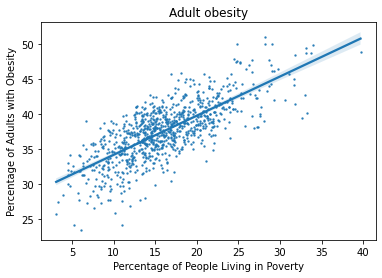

Correlation between Poverty and Obesity: 0.7428379354865062


In [186]:
chart_test = pop_pov_obesity_df[['pov_percentage', 'Adult obesity: % Adults with Obesity']]

chart = sns.regplot(
    x="pov_percentage",
    y="Adult obesity: % Adults with Obesity",
    data=chart_test,
    scatter_kws={'s':2}
)

chart.set_title('Adult obesity')
chart.set(xlabel='Percentage of People Living in Poverty', ylabel='Percentage of Adults with Obesity')

plt.show()
correlation = pop_pov_obesity_df.corr()
povobcorr = correlation.loc['pov_percentage', 'Adult obesity: % Adults with Obesity']
print("Correlation between Poverty and Obesity: " + str(povobcorr))

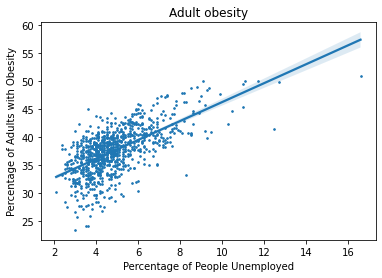

Correlation between Unemployment and Obesity: 0.6285388394823214


In [187]:
chart_unemp = total_df[['Percentage_Unemployed', 'Adult obesity: % Adults with Obesity']]

chart = sns.regplot(
    x="Percentage_Unemployed",
    y="Adult obesity: % Adults with Obesity",
    data=chart_unemp,
    scatter_kws={'s':2}
)

chart.set_title('Adult obesity')
chart.set(xlabel='Percentage of People Unemployed', ylabel='Percentage of Adults with Obesity')

plt.show()
correlation = total_df.corr()
unempobcorr = correlation.loc['Percentage_Unemployed', 'Adult obesity: % Adults with Obesity']
print("Correlation between Unemployment and Obesity: " + str(unempobcorr))

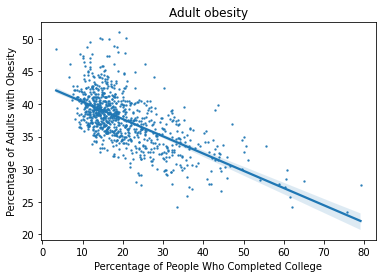

Correlation between College Completion and Obesity: -0.6277743007594321


In [188]:
mask = total_df[total_df["EducationType"] == "Completed College"]
chart_educ = mask[["rate_2010", 'Adult obesity: % Adults with Obesity']]

chart = sns.regplot(
    x="rate_2010",
    y="Adult obesity: % Adults with Obesity",
    data=chart_educ,
    scatter_kws={'s':2}
)


chart.set_title('Adult obesity')
chart.set(xlabel='Percentage of People Who Completed College', ylabel='Percentage of Adults with Obesity')

plt.show()
correlation = mask.corr()
collegeobcorr = correlation.loc['rate_2010', 'Adult obesity: % Adults with Obesity']
print("Correlation between College Completion and Obesity: " + str(collegeobcorr))

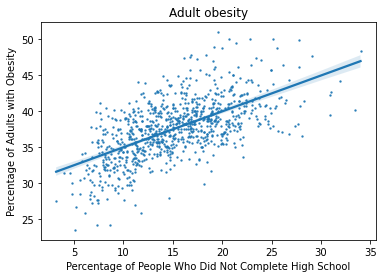

Correlation between High School Completion and Obesity: 0.6147969835321956


In [189]:
mask = total_df[total_df["EducationType"] == "Not Completed High School"]
chart_educ = mask[["rate_2010", 'Adult obesity: % Adults with Obesity']]

chart = sns.regplot(
    x="rate_2010",
    y="Adult obesity: % Adults with Obesity",
    data=chart_educ,
    scatter_kws={'s':2}
)


chart.set_title('Adult obesity')
chart.set(xlabel='Percentage of People Who Did Not Complete High School', ylabel='Percentage of Adults with Obesity')

plt.show()
correlation = mask.corr()
hsobcorr = correlation.loc['rate_2010', 'Adult obesity: % Adults with Obesity']
print("Correlation between High School Completion and Obesity: " + str(hsobcorr))


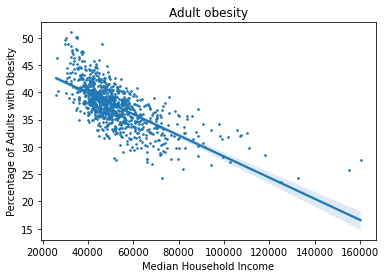

Correlation between Median Household Income and Obesity: -0.6829170288329462


In [190]:
chart_household = total_df[['Median Household Income (2020)', 'Adult obesity: % Adults with Obesity']]

chart = sns.regplot(
    x="Median Household Income (2020)",
    y="Adult obesity: % Adults with Obesity",
    data=chart_household,
    scatter_kws={'s':2}
)

chart.set_title('Adult obesity')
chart.set(xlabel='Median Household Income', ylabel='Percentage of Adults with Obesity')

plt.show()
correlation = total_df.corr()
incobcorr = correlation.loc['Median Household Income (2020)', 'Adult obesity: % Adults with Obesity']
print("Correlation between Median Household Income and Obesity: " + str(incobcorr))

In [191]:
x = total_df[['Severe housing problems: Severe Housing Cost Burden', 'Uninsured: % Uninsured', 'Physical inactivity: % Physically Inactive', 'Adult smoking: % Smokers', 'pov_percentage']]
y = total_df['Adult obesity: % Adults with Obesity']
regr = linear_model.LinearRegression()
regr.fit(x,y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x1 = total_df[['pov_percentage']]
y1 = total_df['Adult obesity: % Adults with Obesity']
regr = linear_model.LinearRegression()
regr.fit(x1,y1)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

correlation = total_df.corr()
physcorr = correlation.loc['pov_percentage', 'Physical inactivity: % Physically Inactive']
print("Correlation: " + str(physcorr))


Intercept: 
 19.385782681859084
Coefficients: 
 [ 0.00750918 -0.1781862   0.55050431 -0.04228555  0.16763383]
Intercept: 
 28.62933619973184
Coefficients: 
 [0.55885276]
Correlation: 0.7976755868261454


test commit - jeff

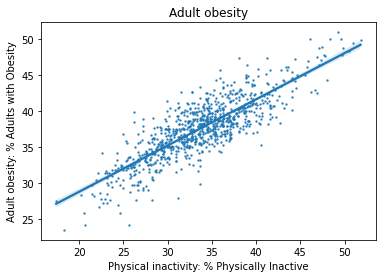

0.8374283270169228


In [192]:
chart_physical_activity = pop_pov_obesity_df[['Adult obesity: % Adults with Obesity', 'Physical inactivity: % Physically Inactive']]

chart_physical_activity = sns.regplot(
    x="Physical inactivity: % Physically Inactive",
    y="Adult obesity: % Adults with Obesity",
    data=chart_physical_activity,
    scatter_kws={'s':2}
)

chart_physical_activity.set_title('Adult obesity')
chart_physical_activity.set(xlabel='Physical inactivity: % Physically Inactive', ylabel='Adult obesity: % Adults with Obesity')

plt.show()
# correlation = pop_pov_obesity_df.corr()
povobcorr = correlation.loc['Adult obesity: % Adults with Obesity', 'Physical inactivity: % Physically Inactive']
print(povobcorr)


Correlation                                                    Access to exercise opportunities: % With Access to Exercise Opportunities  \
Access to exercise opportunities: % With Access...                                           1.000000                           
Physical inactivity: % Physically Inactive                                                  -0.479857                           

                                                    Physical inactivity: % Physically Inactive  
Access to exercise opportunities: % With Access...                                   -0.479857  
Physical inactivity: % Physically Inactive                                            1.000000  


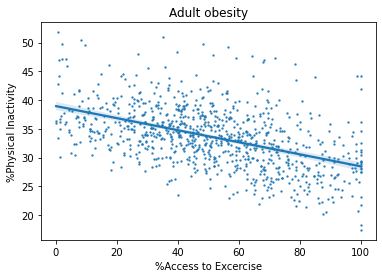

In [244]:
physical_access = pop_pov_obesity_df[['Access to exercise opportunities: % With Access to Exercise Opportunities', 'Physical inactivity: % Physically Inactive']]
physical_access = physical_access.dropna()
chart_physical_access = sns.regplot(
    x="Access to exercise opportunities: % With Access to Exercise Opportunities",
    y="Physical inactivity: % Physically Inactive",
    data=physical_access,
    scatter_kws={'s':2}
)

chart_physical_access.set_title('Adult obesity')
chart_physical_access.set(xlabel='%Access to Excercise', ylabel='%Physical Inactivity')

print(str(physical_access.corr()))

plt.show()
# correlation = pop_pov_obesity_df.corr()
# povobcorr = correlation.loc['Adult obesity: % Adults with Obesity', 'Physical inactivity: % Physically Inactive']



                                                    Adult obesity: % Adults with Obesity  \
Adult obesity: % Adults with Obesity                                            1.000000   
Poor mental health days: Average Number of Ment...                              0.614309   

                                                    Poor mental health days: Average Number of Mentally Unhealthy Days  
Adult obesity: % Adults with Obesity                                                         0.614309                   
Poor mental health days: Average Number of Ment...                                           1.000000                   


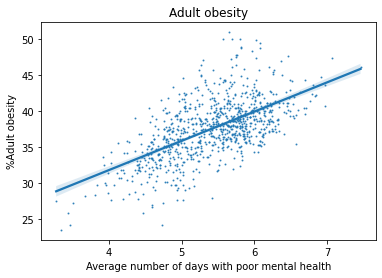

In [194]:
mental_health = pop_pov_obesity_df[['Adult obesity: % Adults with Obesity', 'Poor mental health days: Average Number of Mentally Unhealthy Days']]
chart_mental_health = sns.regplot(
    x="Poor mental health days: Average Number of Mentally Unhealthy Days",
    y="Adult obesity: % Adults with Obesity",
    data=mental_health,
    scatter_kws={'s':1}
)

chart_mental_health.set_title('Adult obesity')
chart_mental_health.set(xlabel='Average number of days with poor mental health', ylabel='%Adult obesity')

print(mental_health.corr())




                                                    Poor mental health days: Average Number of Mentally Unhealthy Days  \
Poor mental health days: Average Number of Ment...                                            1.00000                    
ratio                                                                                        -0.21062                    

                                                      ratio  
Poor mental health days: Average Number of Ment... -0.21062  
ratio                                               1.00000  


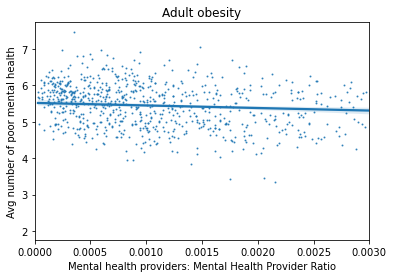

In [195]:
mental_health_df = pop_pov_obesity_df[['Mental health providers: Mental Health Provider Ratio', 'Poor mental health days: Average Number of Mentally Unhealthy Days']]
def convert_to_ratio(input_float):
    input_string = str(input_float)
    split_text = input_string.split(":")
    ratio = 1/int(split_text[0])
    return ratio


mental_health_df = mental_health_df.dropna()
mental_health_df['ratio'] = mental_health_df['Mental health providers: Mental Health Provider Ratio'].apply(convert_to_ratio)
mental_health_df.head()
mental_health_df['Poor mental health days: Average Number of Mentally Unhealthy Days'].astype(float)


chart_mental_health = sns.regplot(
    x="ratio",
    y="Poor mental health days: Average Number of Mentally Unhealthy Days",
    data=mental_health_df,
    scatter_kws={'s':1}
)

chart_mental_health.set_xlim(0, 0.003)

chart_mental_health.set_title('Adult obesity')
chart_mental_health.set(xlabel='Mental health providers: Mental Health Provider Ratio', ylabel='Avg number of poor mental health')
mental_health_df.head()
corr_1 = mental_health_df.corr()

print(corr_1)

#the correlation is -.21 which is not that significant (number of mental health providers do not really affect mental health)


In [196]:
total_df['Poor mental health days: Average Number of Mentally Unhealthy Days'].describe()

count    1804.000000
mean        5.417144
std         0.620317
min         3.276989
25%         4.952378
50%         5.493881
75%         5.850316
max         7.460286
Name: Poor mental health days: Average Number of Mentally Unhealthy Days, dtype: float64

In [197]:
#how do obesity rates compare across different incomes and different mental health
poor_but_good_mental = total_df[(total_df['pov_percentage'] > 19.34) & (total_df['Poor mental health days: Average Number of Mentally Unhealthy Days'] < 4.95)]
poor_and_bad_mental = total_df[(total_df['pov_percentage'] > 19.34) & (total_df['Poor mental health days: Average Number of Mentally Unhealthy Days'] > 5.8)]
rich_and_good_mental = total_df[(total_df['pov_percentage'] < 12.46) & (total_df['Poor mental health days: Average Number of Mentally Unhealthy Days'] < 4.95)]
rich_but_bad_mental = total_df[(total_df['pov_percentage'] < 12.46) & (total_df['Poor mental health days: Average Number of Mentally Unhealthy Days'] > 5.8)]
print(poor_but_good_mental.shape)
print(rich_but_bad_mental.shape)

print(poor_but_good_mental['Adult obesity: % Adults with Obesity'].mean())
print(poor_and_bad_mental['Adult obesity: % Adults with Obesity'].mean())
print(rich_and_good_mental['Adult obesity: % Adults with Obesity'].mean())
print(rich_but_bad_mental['Adult obesity: % Adults with Obesity'].mean())

(16, 237)
(18, 237)
39.349999999999994
41.53613445378149
32.48082191780823
37.37777777777778


In [198]:
##what about places that are poor but still have access to excercise opportunities
poor_but_access = total_df[(total_df['pov_percentage'] > 19.34) & (total_df['Access to exercise opportunities: % With Access to Exercise Opportunities'] > 75)]
poor_and_no_access = total_df[(total_df['pov_percentage'] > 19.34) & (total_df['Access to exercise opportunities: % With Access to Exercise Opportunities'] < 30)]
rich_and_access = total_df[(total_df['pov_percentage'] < 12.46) & (total_df['Access to exercise opportunities: % With Access to Exercise Opportunities'] > 75)]
rich_but_no_access = total_df[(total_df['pov_percentage'] < 12.46) & (total_df['Access to exercise opportunities: % With Access to Exercise Opportunities'] < 30)]


print(poor_but_access['Adult obesity: % Adults with Obesity'].mean())
print(poor_and_no_access['Adult obesity: % Adults with Obesity'].mean())
print(rich_and_access['Adult obesity: % Adults with Obesity'].mean())
print(rich_but_no_access['Adult obesity: % Adults with Obesity'].mean())


39.79999999999999
42.169014084507054
31.57
35.49285714285715


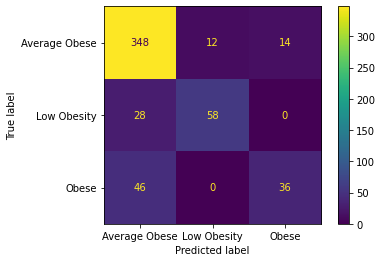

In [247]:
mean_obesity_rate = np.mean(total_df['Adult obesity: % Adults with Obesity'])
stddev = np.std(total_df['Adult obesity: % Adults with Obesity'])
total_df["County Level Obesity"] = ['High Obesity' if i > mean_obesity_rate + stddev else 'Average Obese' if i >= mean_obesity_rate - stddev else 'Low Obesity' for i in total_df['Adult obesity: % Adults with Obesity']]
data = total_df[["pov_percentage", 'Physical inactivity: % Physically Inactive']]
target = total_df['Obesity?']
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state = 999)
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X = train_data, y = train_target)
predictions = log_model.predict(test_data)
cm = confusion_matrix(test_target, predictions, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()
#score = log_model.score(test_data, test_target)
#print(score)

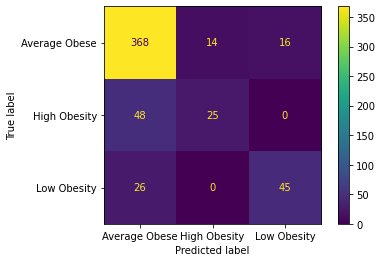

In [242]:
data = total_df[['Physical inactivity: % Physically Inactive']]
target = total_df['County Level Obesity']
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state = 19)
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X = train_data, y = train_target)
predictions = log_model.predict(test_data)
cm = confusion_matrix(test_target, predictions, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()
#score = log_model.score(test_data, test_target)
#print(score)

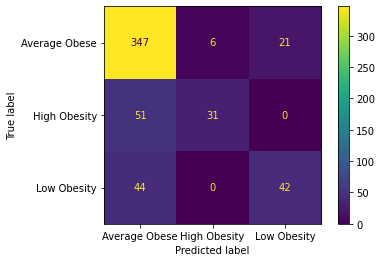

In [248]:
data = total_df[['pov_percentage']]
target = total_df['County Level Obesity']
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state = 999)
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X = train_data, y = train_target)
predictions = log_model.predict(test_data)
cm = confusion_matrix(test_target, predictions, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)
disp.plot()
plt.show()
#score = log_model.score(test_data, test_target)
#print(score)

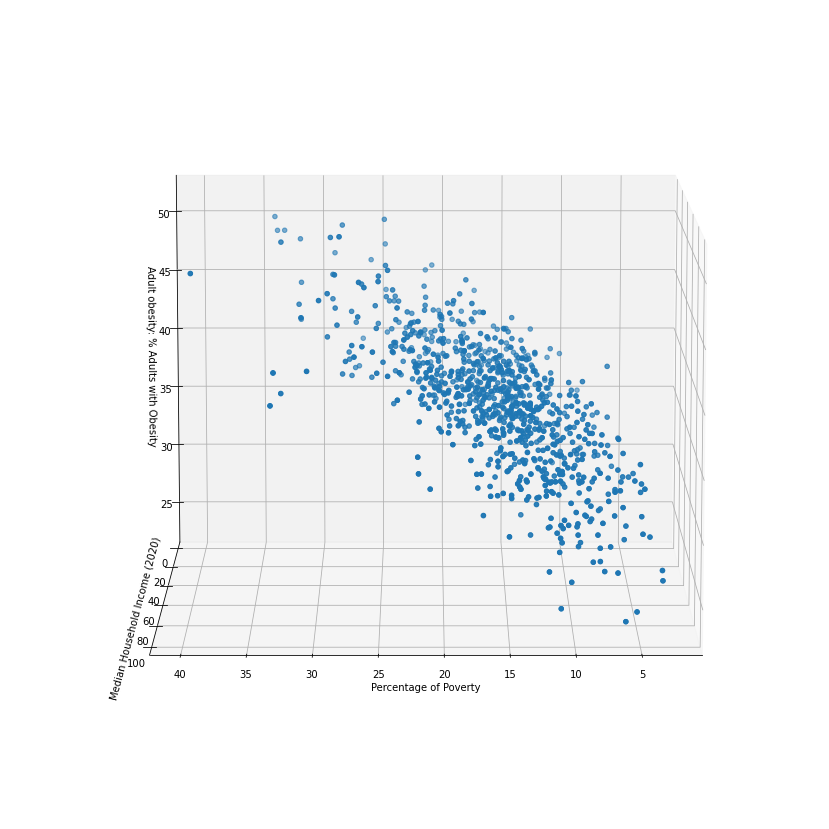

In [255]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection = "3d")
ax.scatter3D(total_df['pov_percentage'], total_df['Access to exercise opportunities: % With Access to Exercise Opportunities'], total_df['Adult obesity: % Adults with Obesity'])
plt.xlabel('Percentage of Poverty')
plt.ylabel('Median Household Income (2020)')
ax.set_zlabel('Adult obesity: % Adults with Obesity')
ax.view_init(10, 90)
#X = total_df['pov_percentage']
#Y = total_df['Median Household Income (2020)']
#Z = total_df['Percentage_Unemployed']
#ax.plot_surface(total_df['pov_percentage'], total_df['Median Household Income (2020)'], total_df['Percentage_Unemployed'])
plt.show()

#total_df.head()Physical inactivity: % Physically Inactive